In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import math
import matplotlib.pyplot as plt  

In [4]:
with open(r'../../data/tidy/Shrewsbury_join_tidy_density.csv') as Shrewsbury_parcel:
    df_Shrewsbury_parcel=pd.read_csv(Shrewsbury_parcel)

In [27]:
FULL_STR=df_Shrewsbury_parcel.FULL_STR.unique()
#FULL_STR

In [36]:
parcel=[]
for i in FULL_STR:
    df=df_Shrewsbury_parcel.loc[df_Shrewsbury_parcel.FULL_STR==i]
    parcel.append(len(df.index))
#parcel

In [37]:
len(parcel)

707

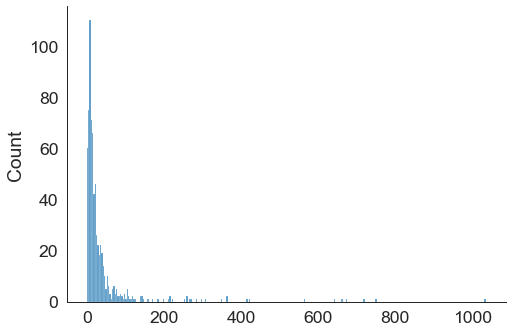

In [42]:
# plotting histogram for CLAY
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=parcel, kind="hist", bins = 300, aspect = 1.5)

,sumsquare_error,aic,bic,kl_div
lognorm,0.000050,2179.421210,-11624.557253,inf
beta,0.000051,5813.361034,-11599.468446,inf
burr,0.000070,2034.128036,-11377.602055,inf
norm,0.001415,5076.932758,-9263.639488,inf
gamma,0.001913,28272.109485,-9044.017691,inf


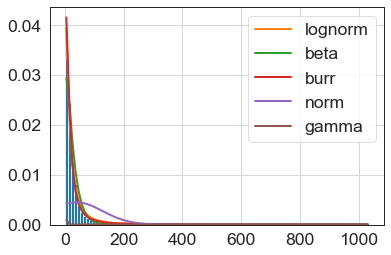

In [44]:
f = Fitter(parcel,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [47]:
# We can see that the lognorm distribution is the best fit based on the sumsquare_error criteria.

In [48]:
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 1.1823428153991393,
  'loc': -0.1886494756247153,
  'scale': 16.81071768144596}}

In [49]:
f.fitted_param["lognorm"]

(1.1823428153991393, -0.1886494756247153, 16.81071768144596)